### Importing Necessary Files

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

Loading dataset

In [67]:
df = pd.read_csv('LGD.csv')

In [4]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


### Eyeballing the data

In [6]:
df.shape

(15290, 7)

In [7]:
df.columns

Index(['Ac_No', 'Age', 'Years of Experience', 'Number of Vehicles', 'Gender',
       'Married', 'Losses in Thousands'],
      dtype='object')

In [8]:
df.isnull().sum()

Ac_No                  0
Age                    0
Years of Experience    0
Number of Vehicles     0
Gender                 0
Married                0
Losses in Thousands    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ac_No,15290.0,149961.789339,28947.841061,100002.000000,124900.500000,149897.500000,175019.500000,200454.0
Age,15290.0,42.328254,18.280511,16.000000,24.000000,42.000000,61.000000,70.0
Years of Experience,15290.0,23.732897,17.850707,0.000000,6.000000,23.000000,42.000000,53.0
Number of Vehicles,15290.0,2.495880,0.953776,1.000000,2.000000,2.000000,3.000000,4.0
Losses in Thousands,15290.0,389.859718,253.729433,12.534521,226.434217,354.937874,488.676927,3500.0


In [12]:
pd.DataFrame(df.dtypes,columns = ['Datatypes'])

,Datatypes
Ac_No,int64
Age,int64
Years of Experience,int64
Number of Vehicles,int64
Gender,object
Married,object
Losses in Thousands,float64


#### Check for outliers if any:

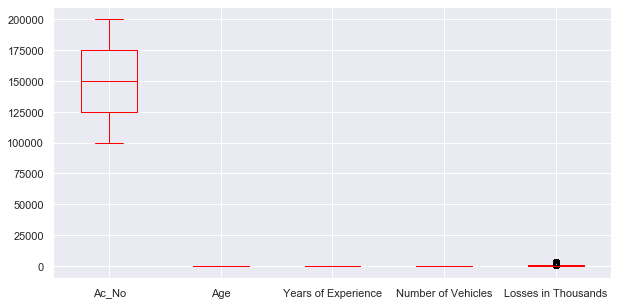

In [35]:
df.boxplot(figsize=(10,5),color='red')

We cannot see any outliers in independent columns. But Losses in Thousands have few outliers.

In [37]:
#Number of outliers
col_val = ['Ac_No','Age','Years of Experience','Number of Vehicles','Losses in Thousands']
for i in col_val:
    print('No. of outliers in {} is {}'.format(i, df[((df[i]-df[i].mean())/df[i].std()).abs() > 3][i].count()))

No. of outliers in Ac_No is 0
No. of outliers in Age is 0
No. of outliers in Years of Experience is 0
No. of outliers in Number of Vehicles is 0
No. of outliers in Losses in Thousands is 197


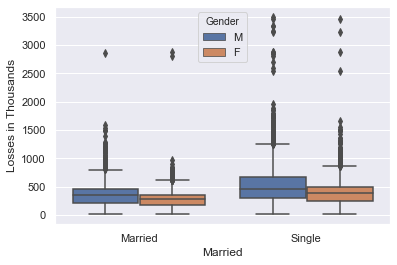

In [45]:
sns.boxplot(x="Married",y="Losses in Thousands",data=df,hue="Gender")

This shows that single people and Male have many outliers.

### Univariate Analysis

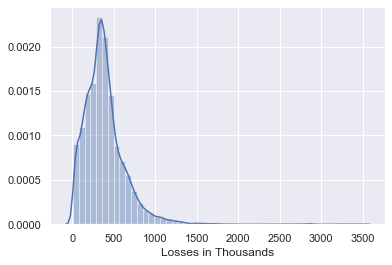

In [38]:
sns.distplot(df['Losses in Thousands'])

Target column 'Losses in Thousands' is Right Skewed.

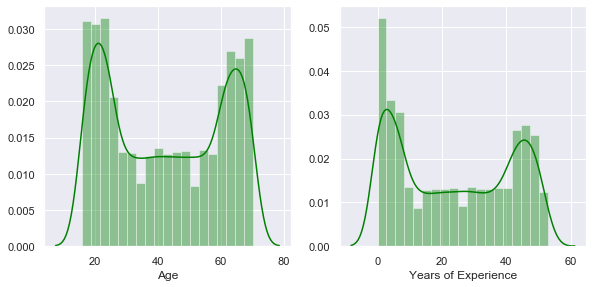

In [40]:
Cols = ['Age','Years of Experience']
pos =1
plt.figure(figsize=(15,15))
for i in Cols:
    plt.subplot(3,3,pos)
    sns.distplot(df[i],hist=True,color='green')
    pos+=1


Here we can see , Age and Years of Experience columns has bimodal distribution. It has two peaks

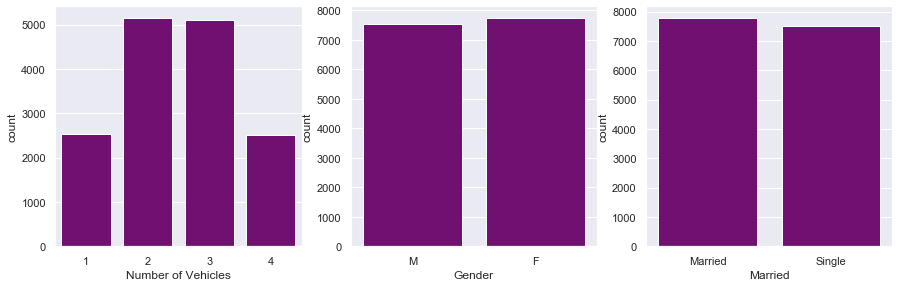

In [41]:
Cols = ['Number of Vehicles','Gender','Married']
pos =1
plt.figure(figsize=(15,15))
for i in Cols:
    plt.subplot(3,3,pos)
    sns.countplot(df[i],color='purple')
    pos+=1


In [42]:
df['Number of Vehicles'].value_counts()

2    5152
3    5095
1    2533
4    2510
Name: Number of Vehicles, dtype: int64

In [43]:
df['Gender'].value_counts()

F    7747
M    7543
Name: Gender, dtype: int64

In [44]:
df['Married'].value_counts()

Married    7783
Single     7507
Name: Married, dtype: int64

In [61]:
df.dtypes

Ac_No                    int64
Age                      int64
Years of Experience      int64
Number of Vehicles       int64
Gender                  object
Married                 object
Losses in Thousands    float64
dtype: object

In [68]:
#Creating dummies for Categorical columns : Gender(F,M) and Married (Married,Single)
df= pd.get_dummies(df,columns=['Gender','Married'])

In [64]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_F,Gender_M,Married_Married,Married_Single
0,150024,24,5,1,203.319595,0,1,1,0
1,144880,31,10,1,402.197302,1,0,0,1
2,133742,56,37,1,553.132096,0,1,1,0
3,151282,52,31,1,292.430579,1,0,1,0
4,174407,20,3,1,246.540576,0,1,0,1


### Multivariate Analysis

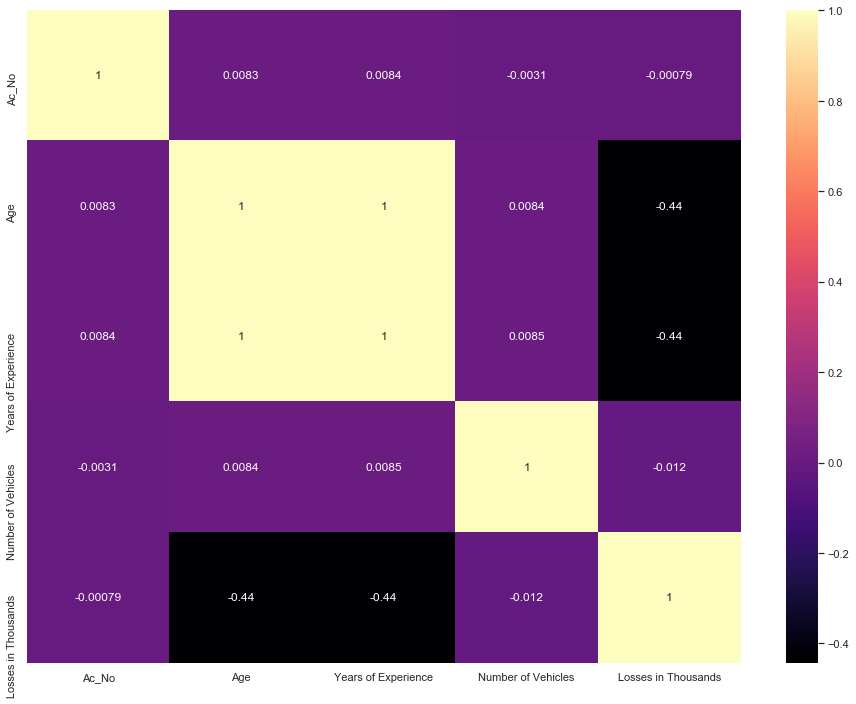

In [48]:
#chekcing correlation between independent varaibles
cor = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels= cor.columns,annot= True,cmap='magma')

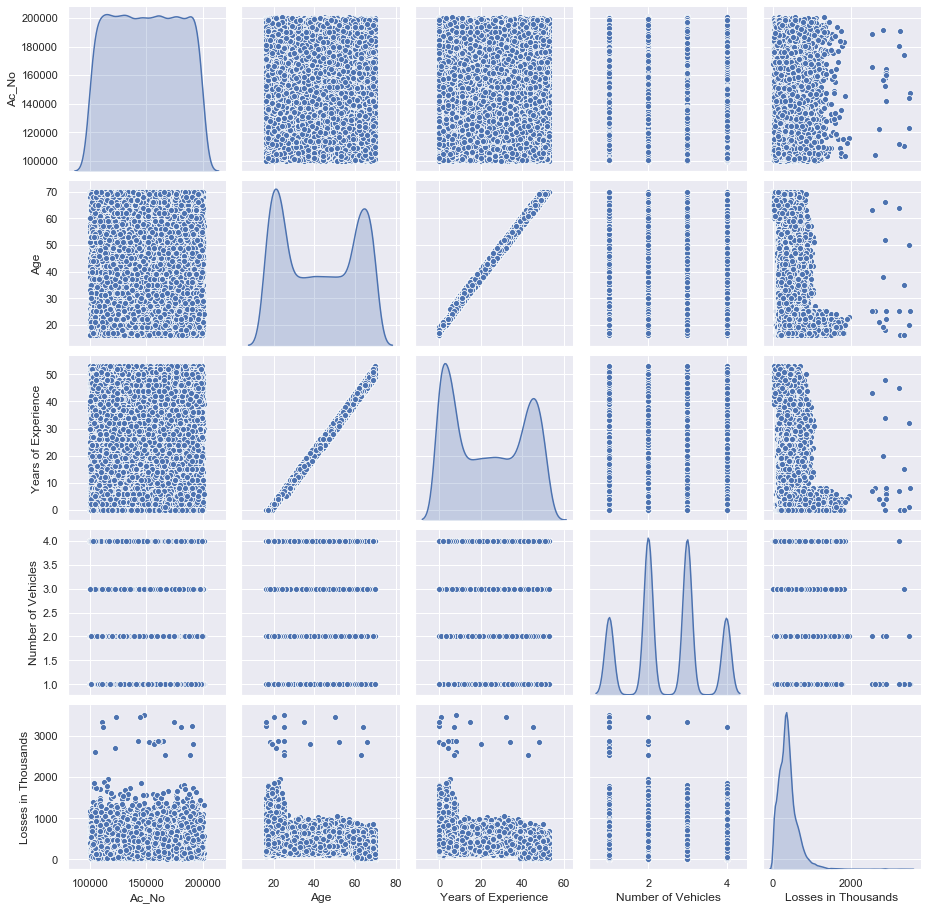

In [49]:
#Pairplot
sns.pairplot(df,diag_kind='kde')

Here we can see that independent columns Age and 'Years of Experience' are hihgly co-related with each other.
We can drop any one of them as, one explains others very well.

### Splitting data

In [78]:
#Independent variable
X= df.drop(['Ac_No','Age','Losses in Thousands','Gender_F','Married_Married'],axis=1)
#Dependent variable
y = df['Losses in Thousands']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

Here we are splitting the data in the ratio of 70:30.

### Creating model

In [84]:
#Creating object of Linear Regression
lr = LinearRegression()

#Training model on Train Data
lr.fit(X_train,y_train)

#Predicting on Test data
pred = lr.predict(X_test)

#Calculating Accuracy
print('On Test data',lr.score(X_test,y_test))
print('On Train data',lr.score(X_train,y_train))
print(lr.coef_)
print(lr.intercept_)
print('R2 Score',r2_score(y_test,pred))



On Test data 0.29612400539646766
On Train data 0.30372474297718377
[ -6.28042237  -1.7959821   97.4775976  136.88090271]
428.3022431764856
R2 Score 0.29612400539646766


We can see that this model predicts around 29% of the people are not going to pay loan back.